# Project: Investigate TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#pose_questions">Posing Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

This project will use the Python libraries NumPy, Pandas, and Matplotlib to make the analysis easier.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the TMDb movie data, we should start by asking questions we might want to understand about the TMDb movie data. Consider, for example, if we were a producer. What kinds of information would you want to know about in order to make smarter business decisions? If we were a film afficianado, what factors might influence how you would want to select the movies to watch?

**Question 1**: Which genres are most popular from year to year? 

**Question 2**: What kinds of properties are associated with movies that have high revenues?

**Question 3**: Which major film studios are the most profitable?

**Question 4**: What kinds of movies elicit high ratings from users?

In [1]:
## import all necessary packages and functions.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## eliminate SettingWithCopyWarning -> this warning will be shown later
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None

<a id='wrangling'></a>
## Data Wrangling

Now, it's time to collect and explore our data. In this project, we will examine information about 10,000 movies collected from The Movie Database (TMDb).

We first load the data into a dataframe called `df` and print out a few lines. Operations will be performed to inspect data types and look for instances of missing or possibly errant data.

### General Properties

In [3]:
# load datasets
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# determine dimension of dataframe
df.shape

(10866, 21)

In [5]:
# return useful descriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# returns a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The dataset looks relatively clean from the initial examination. This was cleaned from the original data from Kaggle. It is worth noting that all fields were filled out by users so we don't expect them to agree on keywords, genres, ratings, or the like. 

There are exactly 10,866 movies and 21 columns or categories contained in the dataset. Unfortunately, there are no descriptions provided per column from Kaggle. However, most of the labels of the columns are already self-explanatory but some columns need further clarification which will be done in the data cleaning process. 

### Dropping Unnecessary Columns

The first procedure in cleaning the data is dropping some unnecessary columns which will not aid us in answering the four questions we posted earlier. The columns to be dropped are listed below. A brief explanation is provided for each selected column. The columns are already in lowercase which will not need editing.

- `id`: This is from TMDb and is unique to each movie which does not affect other variables.
- `imdb_id`: This is from IMDB and is unique to each movie which does not affect other variables.
- `popularity`: According to [TMDb support](https://www.themoviedb.org/talk/592fc1f792514169700060f4?language=en%201/), this has nothing to do with Nielsen ratings and is based on user interactions on the website. Release date also plays a part with recently released movies weighted higher in popularity
- `budget`: There exists another column, budget_adj which show the budget in terms of 2010 dollars, accounting for inflation over time.
- `revenue`: There exists another column, revenue_adj which show the revenue in terms of 2010 dollars, accounting for inflation over time.
- `cast`: Several big-name actors/actresses may skew the results of the other variables. For simplicity, this will not be used.
- `homepage`: This is unique to each movie and does not affect other variables.
- `director`: Similar to cast, several big name directors may skew the results, thus are dropped.
- `tagline`: This is unique to each movie and does not affect other variables.
- `keywords`: This is unique to each movie and does not affect other variables.
- `overview`: This is unique to each movie and does not affect other variables.
- `release_date`: There exists a column release_year which will be used in the analysis.

In [7]:
# drop columns 
df.drop(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'release_date'], axis=1, inplace=True)

In [8]:
# check new dataframe after dropping columns
df.head()

,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
# returns summary of the dataframe after dropping columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
original_title          10866 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 764.1+ KB


There are some null values for the columns `genres` and `production_companies`. Since those columns are of the object type, the process of filling in the mean values will not be possible. Whether or not to drop the rows with null values will depend on the questions posted earlier.

### Dealing with Missing Values

The column `genres` has 23 rows with missing values. Looking at the data below, the same rows also have zero values in `budget_adj` and `revenue_adj` and null values in `production_companies`. These values are needed to answer questions 1 to 3. These values can be safely dropped.

In [10]:
# check rows with null values for the genres column
df[df.genres.isnull()]

,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,Belli di papÃ,100,NaN,NaN,21,6.1,2015,0.00000,0.0
620,All Hallows' Eve 2,90,NaN,Ruthless Pictures|Hollywood Shorts,13,5.0,2015,0.00000,0.0
997,Star Wars Rebels: Spark of Rebellion,44,NaN,NaN,13,6.8,2014,0.00000,0.0
1712,Prayers for Bobby,88,NaN,Daniel Sladek Entertainment,57,7.4,2009,0.00000,0.0
1897,Jonas Brothers: The Concert Experience,76,NaN,NaN,11,7.0,2009,0.00000,0.0
2370,Freshman Father,0,NaN,NaN,12,5.8,2010,0.00000,0.0
2376,Doctor Who: A Christmas Carol,62,NaN,NaN,11,7.7,2010,0.00000,0.0
2853,Vizontele,110,NaN,NaN,12,7.2,2001,0.00000,0.0
3279,ì•„ê¸°ì™€ ë‚˜,96,NaN,NaN,11,6.1,2008,0.00000,0.0
4547,London 2012 Olympic Opening Ceremony: Isles of...,220,NaN,BBC,12,8.3,2012,0.00000,0.0


In [11]:
# drop rows with null values for the genres column
df.dropna(inplace=True, subset=['genres'])

The column `production_companies` has 1,016 rows with missing values. Before dropping this huge number of rows, it is worth looking at the data and check the other columns before doing anything. The `genres` column is filled but most of the `budget_adj` and `revenue_adj` have zero values. Since the number of rows are significant in count and the genres columns are filled anyway, it will be decided to retain the rows. The zero values in `budget_adj` and `revenue_adj` will be dealt with later.

In [12]:
# check rows with null values for the production_companies column
df[df.production_companies.isnull()]

,original_title,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,Racing Extinction,90,Adventure|Documentary,NaN,36,7.8,2015,0.000000e+00,0.000000e+00
259,Crown for Christmas,84,TV Movie,NaN,10,7.6,2015,0.000000e+00,0.000000e+00
295,12 Gifts of Christmas,84,Family|TV Movie,NaN,12,6.3,2015,0.000000e+00,0.000000e+00
298,The Girl in the Photographs,95,Crime|Horror|Thriller,NaN,10,4.7,2015,0.000000e+00,0.000000e+00
328,Advantageous,92,Science Fiction|Drama|Family,NaN,29,6.4,2015,0.000000e+00,0.000000e+00
370,Meru,89,Adventure|Documentary,NaN,42,6.9,2015,0.000000e+00,2.147489e+06
374,The Sisterhood of Night,104,Mystery|Drama|Thriller,NaN,25,6.6,2015,0.000000e+00,0.000000e+00
382,Unexpected,90,Drama|Comedy,NaN,22,5.7,2015,0.000000e+00,0.000000e+00
388,Walter,87,Drama|Comedy,NaN,12,5.2,2015,6.439997e+05,0.000000e+00
393,Night Of The Living Deb,85,Comedy|Horror,NaN,13,5.7,2015,1.839999e+06,0.000000e+00


After dropping the unnecessary rows, the index will be reset so as to access the data sequentially. This will be helpful during the exploratory data analysis phase.

In [13]:
# reset the index of the dataframe 
df = df.reset_index(drop=True)

### Splitting Pipe (`|`) Characters

The `genres` and `production_companies` columns have pipe (`|`) characters which means that a movie may have multiple genres and multiple production companies. For example, Star Wars: The Force Awakens was categorized as having the following genres: Action, Adventure, Science Fiction, and Fantasy. It also has multiple film studios who worked on it namely Lucasfilm, Truenorth Productions, and Bad Robot. 

The two columns will be split into a list for analysis. Then new columns `genres_split` and `production_companies_split` will be created to contain the new lists. The old columns `genres` and `production_companies` will be deleted. Finally, we set the index to `original_title` so we can access the data of a movie by title.

It was mentioned in Kaggle that all fields were filled out by users so must not expect them to agree on keywords, genres, ratings, or the like. For the purpose of this analysis, we will treat them as correct and their accuracy will not be tested.

In [14]:
# split the genres and producdtion_companies column into lists, then adds them to a new column in the dataframe
df.insert(loc=3, column='genres_split', value=df['genres'].str.split('|'))
df.insert(loc=5, column='production_companies_split', value=df['production_companies'].str.split('|'))

# drop the old columns where the values were split
df.drop(['genres', 'production_companies'], axis=1, inplace=True)
df.set_index('original_title', inplace=True)

In [15]:
# check new dataframe after dropping splitting and dropping columns
df.head()

,runtime,genres_split,production_companies_split,vote_count,vote_average,release_year,budget_adj,revenue_adj
original_title,,,,,,,,
Jurassic World,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09
Mad Max: Fury Road,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015,1.379999e+08,3.481613e+08
Insurgent,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015,1.012000e+08,2.716190e+08
Star Wars: The Force Awakens,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",5292,7.5,2015,1.839999e+08,1.902723e+09
Furious 7,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015,1.747999e+08,1.385749e+09


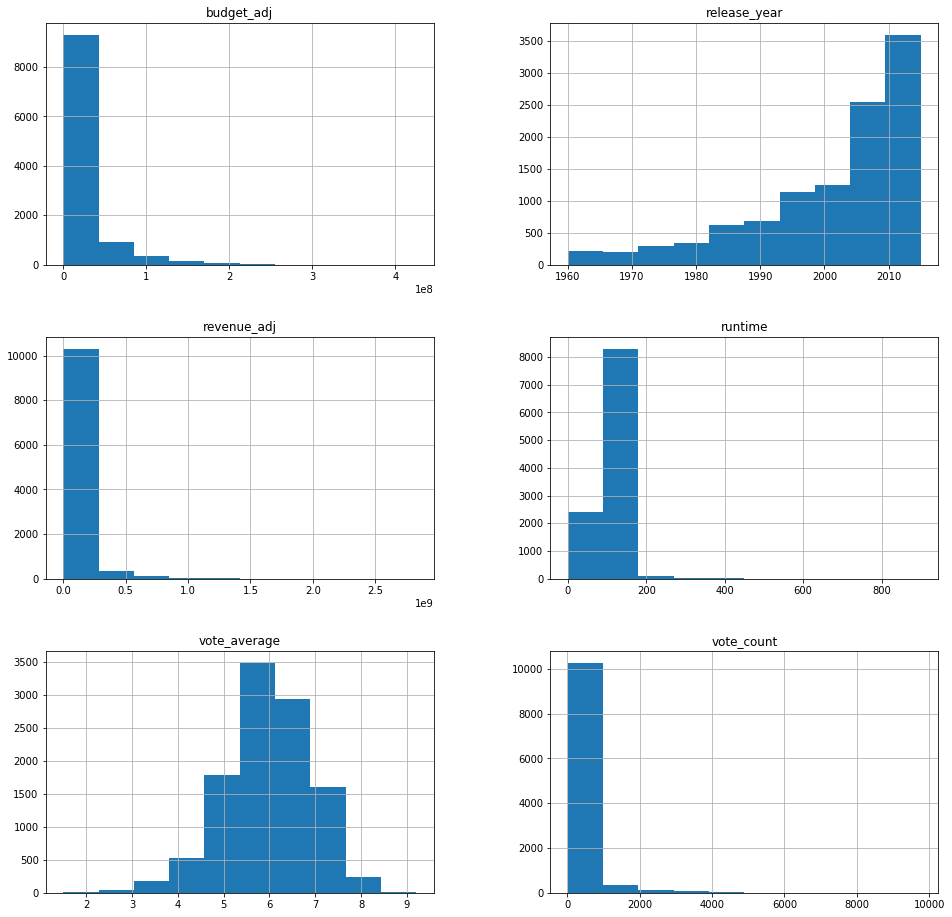

In [16]:
# explore data 
df.hist(figsize=(16, 16));

The columns `budget_adj`, `revenue_adj`, `runtime`, and `vote_count` can be seen as being skewed to the right while `release_year` is skewed to the left. The column `vote_average` follows a normal distribution.

<a id='eda'></a>
## Exploratory Data Analysis

Now that the unnecessary columns were dropped, applicable null values deleted, and pipe (`|`) characters split, we can now proceed with answering the four questions posted earlier. The answers will be provided using statistics and visualizations.

### Q1: Which genres are most popular from year to year?

To answer the first question, we should first count the total number of movies per genre for the whole duration from 1960 to 2015. We can use `Counter` from the `collections` library to count the occurrences of the movies per genre from the lists created in the  `genres_split` column. This [link](https://docs.python.org/3.6/library/collections.html) describes the module. 

In order to plot the number of movies per genre, we convert the `Counter` object (a dictionary) into a new dataframe and fix the column labels. Then, a sorted bar chart is used to display the total number of movies per genre.

In [17]:
# count the number of movies per genre for the whole dataframe
from collections import Counter

num_movies_per_genre = Counter()
for i in range(len(df['genres_split'])):
    num_movies_per_genre += Counter(df['genres_split'][i])

In [18]:
# create new dataframe based on the count of movies per genre
df_genre = pd.DataFrame(list(num_movies_per_genre.items()), columns=['genre', 'num_movies'])
df_genre.head()

,genre,num_movies
0,Action,2385
1,Adventure,1471
2,Science Fiction,1230
3,Thriller,2908
4,Fantasy,916


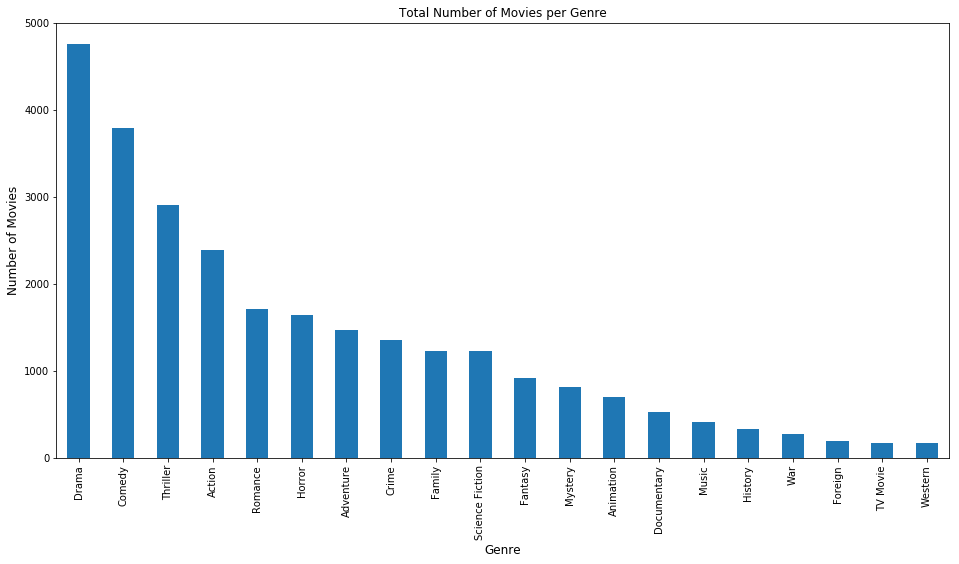

In [19]:
# show bar chart of the number of movies per genre
ax = df_genre.sort_values('num_movies', ascending=False).plot(x='genre', y='num_movies', title='Total Number of Movies per Genre', kind='bar', legend=False, figsize=(16,8))
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Number of Movies', fontsize=12)
plt.show()

From the bar chart above, we can see that the majority of the films produced since 1960 were Drama movies. It leads by a wide margin to the second type which is Comedy. Thriller, Action, Romance round up the top 5 overall genres. We will then plot the number of movies per genre per release year. To simplify the line chart, we will only consider the top 5 overall genres gathered from the bar chart. The genres which to be compared per release year will be: Drama, Comedy, Thriller, Action, and Romance.

A new dataframe will be created to show the release year and the nested list of genres of the movies for that year. Then, the genres to be compared will be counted, and each individual value will be added in a new column for that genre. The dataframe should show the number of movies per genre per release year. It would be better to show the change in proportions rather than the change in counts since 1960. Thus, the dataframe will then be modified to show the proportions.

In [20]:
# create a new dataframe grouping the release year and adding the list of genres of movies for that year
df_release_year = pd.DataFrame(df.groupby('release_year')['genres_split'].apply(list))
df_release_year.head()

,genres_split
release_year,
1960,"[[Drama, Horror, Thriller], [Action, Adventure..."
1961,"[[Adventure, Animation, Comedy, Family], [Come..."
1962,"[[Adventure, Action, Thriller], [Adventure, Dr..."
1963,"[[Action, Thriller, Adventure], [Animation, Fa..."
1964,"[[Adventure, Action, Thriller], [Drama, Comedy..."


In [21]:
# create new counter object and several lists of genres
num_genres_per_year = Counter()
drama = []
comedy = []
thriller = []
action = []
romance = []

# count the number of movies per genre per release year and appends them to the lists of genres
for i in range(len(df_release_year)):
    for j in df_release_year.iloc[i]:
        drama.append(Counter(x for xs in j for x in set(xs))['Drama'])
        comedy.append(Counter(x for xs in j for x in set(xs))['Comedy'])
        thriller.append(Counter(x for xs in j for x in set(xs))['Thriller'])
        action.append(Counter(x for xs in j for x in set(xs))['Action'])
        romance.append(Counter(x for xs in j for x in set(xs))['Romance']) 

In [22]:
# insert the lists of genres into the dataframe then drop the old column
df_release_year['drama'] = drama
df_release_year['comedy'] = comedy
df_release_year['thriller'] = thriller
df_release_year['action'] = action
df_release_year['romance'] = romance
df_release_year.drop('genres_split', axis=1, inplace=True)

In [23]:
# check new dataframe showing number of movies per genre per release year
df_release_year.head()

,drama,comedy,thriller,action,romance
release_year,,,,,
1960,13,8,6,8,6
1961,16,10,0,7,7
1962,21,5,7,8,5
1963,13,13,10,4,8
1964,20,16,9,5,9


In [24]:
# create a new column in the dataframe which adds all the genres
df_release_year['sum'] = df_release_year['drama'] + df_release_year['comedy'] + df_release_year['thriller'] + df_release_year['action'] + df_release_year['romance']

# create new columns for the proportion of the genre
df_release_year['drama_prop'] = df_release_year['drama'] / df_release_year['sum']
df_release_year['comedy_prop'] = df_release_year['comedy'] / df_release_year['sum']
df_release_year['thriller_prop'] = df_release_year['thriller'] / df_release_year['sum']
df_release_year['action_prop'] = df_release_year['action'] / df_release_year['sum']
df_release_year['romance_prop'] = df_release_year['romance'] / df_release_year['sum']

In [25]:
# check new dataframe showing the proportions
df_release_year.head()

,drama,comedy,thriller,action,romance,sum,drama_prop,comedy_prop,thriller_prop,action_prop,romance_prop
release_year,,,,,,,,,,,
1960,13,8,6,8,6,41,0.317073,0.195122,0.146341,0.195122,0.146341
1961,16,10,0,7,7,40,0.400000,0.250000,0.000000,0.175000,0.175000
1962,21,5,7,8,5,46,0.456522,0.108696,0.152174,0.173913,0.108696
1963,13,13,10,4,8,48,0.270833,0.270833,0.208333,0.083333,0.166667
1964,20,16,9,5,9,59,0.338983,0.271186,0.152542,0.084746,0.152542


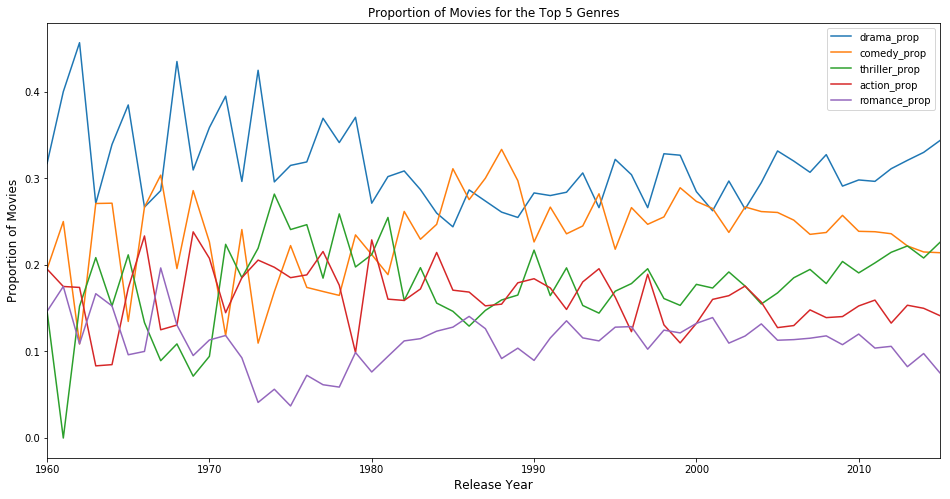

In [26]:
# show line chart of the proportion of movies per genre per release year
ax = df_release_year.plot(y=['drama_prop', 'comedy_prop', 'thriller_prop', 'action_prop', 'romance_prop'], title='Proportion of Movies for the Top 5 Genres', kind='line', figsize=(16,8))
ax.set_xlabel('Release Year', fontsize=12)
ax.set_ylabel('Proportion of Movies', fontsize=12)
plt.show()

The line chart shows that Drama was the most popular genre in almost every release year except in the late 80s. It also had its ups and downs in the 90s and early 2000s but extended its lead in the late 2000s until the present. Another interesting observation is how Thriller overtook Comedy as the second leading genre in 2015. It was the Comedy genre which consistently lead against the Thriller genre but lately, the latter became more popular. 

### Q2:  What kinds of properties are associated with movies that have high revenues?

After determining the popularity of genres as it varied from year to year, we now turn our attention to the kinds of properties that result to movies having high revenues. First, we need to remember that most of the movies have zero values for the revenue. Looking at the descriptive statistics for `revenue_adj` confirms that more than half of the movies have zero revenues. It does not mean that the movie had generated zero revenues but could only mean that the people who generated this data did not have the actual information on the revenue generated for those particular movies.

The movies which do not have values for the revenue will not be included in the analysis. We will create a new dataframe listing only the movies which have revenue values.

In [27]:
# return useful descriptive statistics for revenue_adj column
df.describe()['revenue_adj']

count    1.084300e+04
mean     5.147332e+07
std      1.447664e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.387655e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [28]:
# create new dataframe listing only the movies which have revenue values
df_revenue = df[df['revenue_adj'] > 0]

In [29]:
df_revenue.describe()

,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4850.000000,4850.000000,4850.000000,4850.000000,4.850000e+03,4.850000e+03
mean,107.964742,436.215876,6.148763,2000.921649,3.516102e+07,1.150774e+08
std,21.112847,806.416200,0.798795,11.569192,4.375672e+07,1.988419e+08
min,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,95.000000,46.000000,5.600000,1994.000000,2.332078e+06,1.046262e+07
50%,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.392749e+07
75%,117.000000,435.000000,6.700000,2010.000000,4.973516e+07,1.315644e+08
max,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [30]:
# return useful descriptive statistics for new revenue_adj column
df_revenue.describe()['revenue_adj']

count    4.850000e+03
mean     1.150774e+08
std      1.988419e+08
min      2.370705e+00
25%      1.046262e+07
50%      4.392749e+07
75%      1.315644e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

As expected, more than half of the rows were eliminated in the new dataframe. We can "cut" the data into groups based on the values of the descriptive statistics of the `revenue_adj` column. This can enable us to find a simple pattern between the revenue and the variable in question.

In [31]:
# create bin edges that will be used to "cut" the data into groups
bin_edges = [2.370705e+00, 1.046262e+07, 4.392749e+07, 1.315644e+08, 2.827124e+09]

In [32]:
# create labels for the four revenue level groups
bin_names = ['low', 'medium', 'moderately high', 'high']

In [33]:
# create revenue_levels column
df_revenue['revenue_level'] = pd.cut(df_revenue['revenue_adj'], bin_edges, labels=bin_names)

# check new dataframe after creating new column
df_revenue.head()

,runtime,genres_split,production_companies_split,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_level
original_title,,,,,,,,,
Jurassic World,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09,high
Mad Max: Fury Road,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015,1.379999e+08,3.481613e+08,high
Insurgent,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015,1.012000e+08,2.716190e+08,high
Star Wars: The Force Awakens,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",5292,7.5,2015,1.839999e+08,1.902723e+09,high
Furious 7,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015,1.747999e+08,1.385749e+09,high


We can then find the median values for each revenue level since there will be outliers. The groups to be examined will be `runtime`, `vote_average`, and `budget`.

In [34]:
# find the mean runtime of each revenue level with groupby
df_revenue.groupby('revenue_level')['runtime'].median()

revenue_level
low                 99
medium             102
moderately high    106
high               113
Name: runtime, dtype: int64

In [35]:
# find the mean rating of each revenue level with groupby
df_revenue.groupby('revenue_level')['vote_average'].median()

revenue_level
low                6.1
medium             6.0
moderately high    6.2
high               6.4
Name: vote_average, dtype: float64

In [36]:
# find the mean budget of each revenue level with groupby
df_revenue.groupby('revenue_level')['budget_adj'].median()

revenue_level
low                9.854119e+05
medium             1.552531e+07
moderately high    2.868209e+07
high               6.785786e+07
Name: budget_adj, dtype: float64

Based on the initial examinations, higher revenue movies tend to have higher runtimes, higher ratings, and higher budgets. Furthermore, we can use correlation to check the relationship between the `revenue` and the three groups above.

We first need to find extreme outliers using box plots, then remove them. Once outliers have been removed, we can check the correlation to find out the relationship. Individual box plots are created since the range of the values for each variable is different.

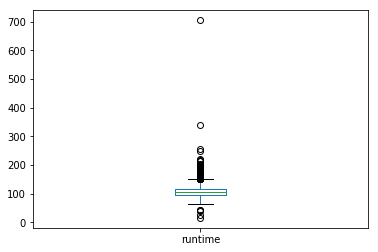

In [37]:
# create boxplot for runtime
df_revenue['runtime'].plot(kind='box');

0.29339128343965226

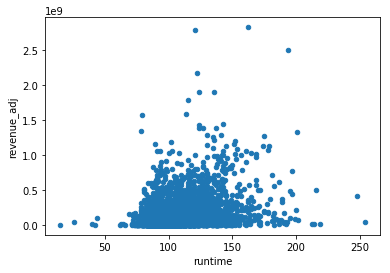

In [38]:
# exclude runtime greater than 300 minutes then plot and calculate correlation
df_revenue[df_revenue['runtime'] < 300].plot(x='runtime', y='revenue_adj', kind='scatter')
df_revenue[df_revenue['runtime'] < 300]['runtime'].corr(df_revenue[df_revenue['runtime'] < 300]['revenue_adj'])

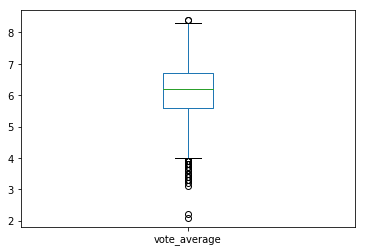

In [39]:
# create boxplot for vote_average
df_revenue['vote_average'].plot(kind='box');

0.24256247065948103

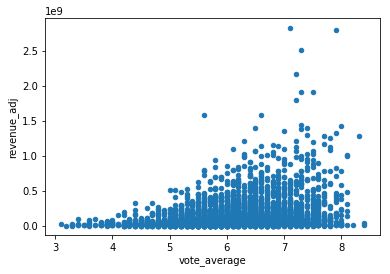

In [40]:
# exclude vote_average less than than 3 then plot and calculate correlation
df_revenue[df_revenue['vote_average'] > 3].plot(x='vote_average', y='revenue_adj', kind='scatter')
df_revenue[df_revenue['vote_average'] > 3]['vote_average'].corr(df_revenue[df_revenue['vote_average'] > 3]['revenue_adj'])

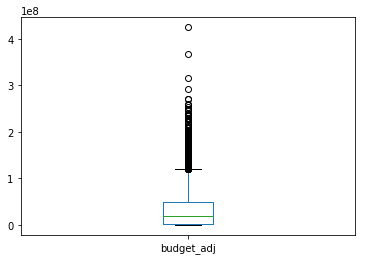

In [41]:
# create boxplot for budget_adj
df_revenue['budget_adj'].plot(kind='box');

0.59482298470515516

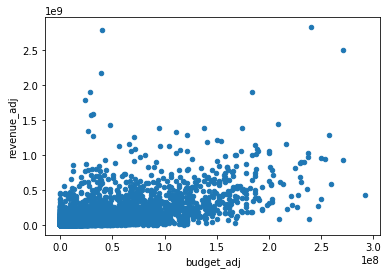

In [42]:
# exclude budget_adj greater than 3e8 then plot and calculate correlation
df_revenue[df_revenue['budget_adj'] < 3e8].plot(x='budget_adj', y='revenue_adj', kind='scatter')
df_revenue[df_revenue['budget_adj'] < 3e8]['budget_adj'].corr(df_revenue[df_revenue['budget_adj'] < 3e8]['revenue_adj'])

Among the three variables, `budget_adj` has the strongest positive correlation with `revenue_adj`. It shows a moderately strong correlation overall. Meanwhile, both `runtime` and `vote_average` have weak positive correlations with the `revenue_adj`. It can be inferred that higher budget movies have higher revenues. However, it does not mean that a higher budget movie can cause it to have higher revenue. This analysis needs to undergo further statistical analysis to imply that it is true.

So far, quantitative variables have been analyzed to check their correlation with the revenues. We can also use a qualitative or categorical variable to check how it affects the revenue of a movie. The same algorithm for counting the genres can be used to check which genres produce the highest revenues. First, another dataframe will be created for each revenue level and their list of genres. Then, `Counter` can be used similarly to get the count of the genres. The top 5 genres per revenue level can now be determined.

In [43]:
# create a new dataframe grouping the revenue level and adding the list of genres of movies for that level
df_revenue_level = pd.DataFrame(df_revenue.groupby('revenue_level')['genres_split'].apply(list))
df_revenue_level

,genres_split
revenue_level,
low,"[[Thriller, Comedy, Drama, Romance, Science Fi..."
medium,"[[Drama, Science Fiction], [Mystery, Drama], [..."
moderately high,"[[Action, Drama], [Comedy, Drama], [Drama, Thr..."
high,"[[Action, Adventure, Science Fiction, Thriller..."


In [44]:
# create a dictionary of genres per revenue level and create a list of revenue level
num_genre_per_revenue = {}
revenue_level = ['low', 'medium', 'moderately_high', 'high']

# count the number of movies per revenue level
for i in range(len(df_revenue_level)):
    for j in df_revenue_level.iloc[i]:
        num_genre_per_revenue[revenue_level[i]] = Counter(x for xs in j for x in set(xs))

In [45]:
# print the top 5 genres per revenue level
for k, v in num_genre_per_revenue.items():
    print('{} revenue films are from {}.'.format(k.title(), v.most_common(5)))

Low revenue films are from [('Drama', 694), ('Comedy', 410), ('Thriller', 325), ('Romance', 229), ('Action', 201)].
Medium revenue films are from [('Drama', 604), ('Comedy', 446), ('Thriller', 381), ('Action', 280), ('Romance', 244)].
Moderately_High revenue films are from [('Drama', 541), ('Comedy', 482), ('Thriller', 360), ('Action', 311), ('Crime', 214)].
High revenue films are from [('Action', 469), ('Drama', 436), ('Comedy', 433), ('Adventure', 402), ('Thriller', 358)].


For low to moderately high revenue films, drama tops the list while comedy and thriller follow the second and third rankings. A combination of thriller, romance and action films round up the top 5. Interestingly, action films receive high revenues instead of the usual drama. Adventure films also make an appearance in the top 5 genre of high revenue films.

The rest of the genres compared with their revenue levels are shown in the bar plot below. It is sorted by high revenue level so the first genre which appears has the highest revenues and so forth. Other observations can be taken from the plot such as more than half of the adventure films receive high revenues. Most documentary films have low revenues.

In [46]:
# create new dataframe to contain the number of movies per genre per revenue level
df_num_genre_per_revenue = pd.DataFrame(num_genre_per_revenue)
df_num_genre_per_revenue[['high', 'moderately_high', 'medium', 'low']].head()

,high,moderately_high,medium,low
Action,469.0,311,280.0,201.0
Adventure,402.0,204,151.0,86.0
Animation,126.0,43,35.0,33.0
Comedy,433.0,482,446.0,410.0
Crime,185.0,214,214.0,161.0


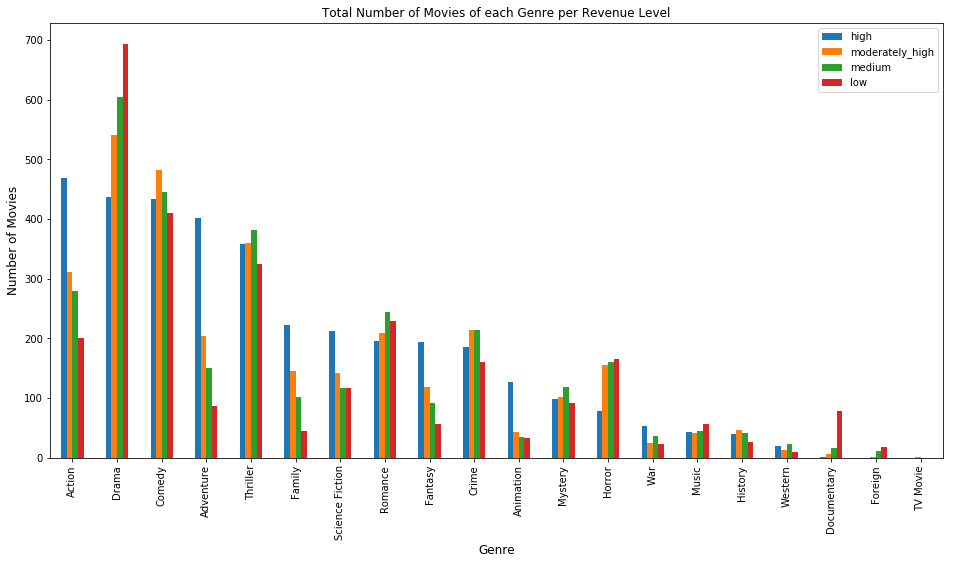

In [47]:
# show bar chart of the number of movies per genre per revenue level
ax = df_num_genre_per_revenue[['high', 'moderately_high', 'medium', 'low']].sort_values('high', ascending=False).plot(title='Total Number of Movies of each Genre per Revenue Level', kind='bar', legend=True, figsize=(16,8))
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Number of Movies', fontsize=12)
plt.show()

### Q3:  Which major film studios are the most profitable?

Most movies often have many production companies working to make it. To answer the third question, we will only consider the first production company listed. We will go back to the original dataframe `df` and modify it by adding new columns for the `major_studio` and `profit`. The `major_studio` will be the first element from the `production_companies_split` and the `profit` is simply the difference between `revenue_adj` and `budget_adj`.

Recall earlier that there are some null values in the `production_companies` column. Since the third question requires complete data from that column, it would be better this time to drop the missing values. In order to retain the original dataframe `df`, we can create a new one `df_major` containing the same data but dropping the null values.

In [48]:
# create a new dataframe dropping missing values from `production_companies_split' column
df_major = df.dropna(subset=['production_companies_split'])

In [49]:
# returns summary of the dataframe after dropping rows
df_major.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9827 entries, Jurassic World to Manos: The Hands of Fate
Data columns (total 8 columns):
runtime                       9827 non-null int64
genres_split                  9827 non-null object
production_companies_split    9827 non-null object
vote_count                    9827 non-null int64
vote_average                  9827 non-null float64
release_year                  9827 non-null int64
budget_adj                    9827 non-null float64
revenue_adj                   9827 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 691.0+ KB


In [50]:
# create list of major studios
major_studio = []

# extract the first element from the `production_companies_split` row list
for i in range(len(df_major['production_companies_split'])):
    major_studio.append(df_major['production_companies_split'].iloc[i][0])
    
# insert the lists of major studios into the dataframe
df_major['major_studio'] = major_studio

In [51]:
# create a new column for the profit
df_major['profit'] = df_major['revenue_adj'] - df_major['budget_adj']

In [52]:
# check new dataframe after creating new columns
df_major.head()

,runtime,genres_split,production_companies_split,vote_count,vote_average,release_year,budget_adj,revenue_adj,major_studio,profit
original_title,,,,,,,,,,
Jurassic World,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09,Universal Studios,1.254446e+09
Mad Max: Fury Road,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015,1.379999e+08,3.481613e+08,Village Roadshow Pictures,2.101614e+08
Insurgent,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015,1.012000e+08,2.716190e+08,Summit Entertainment,1.704191e+08
Star Wars: The Force Awakens,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",5292,7.5,2015,1.839999e+08,1.902723e+09,Lucasfilm,1.718723e+09
Furious 7,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015,1.747999e+08,1.385749e+09,Universal Pictures,1.210949e+09


We can determine the top 10 major film studios by revenue by using the grouping the films by its major studio and adding up the profits for each. Then they will be sorted and the 10 largest values will be printed as shown below. Movies created by Universal Pictures and Paramount Pictures have high profits amounting nearly 4 billion US dollars each.

In [53]:
# group by major studio, add their profits, and print the top 10 largest values
df_major.groupby('major_studio')['profit'].sum().nlargest(10)

major_studio
Universal Pictures                        3.896905e+10
Paramount Pictures                        3.743327e+10
Walt Disney Pictures                      2.563860e+10
Twentieth Century Fox Film Corporation    2.342800e+10
Columbia Pictures                         2.024102e+10
Warner Bros.                              1.310642e+10
Lucasfilm                                 1.309477e+10
New Line Cinema                           1.053596e+10
Eon Productions                           1.005675e+10
DreamWorks SKG                            8.441302e+09
Name: profit, dtype: float64

We can also check the top films by Universal Pictures according to revenue. The top 2 highest earning films by that film studio are Jaws and E.T. the Extra-Terrestrial.

In [54]:
df_major.loc[df_major['major_studio'] == 'Universal Pictures'].sort_values(by=['profit'], ascending=False).head()

,runtime,genres_split,production_companies_split,vote_count,vote_average,release_year,budget_adj,revenue_adj,major_studio,profit
original_title,,,,,,,,,,
Jaws,124,"[Horror, Thriller, Adventure]","[Universal Pictures, Zanuck/Brown Productions]",1415,7.3,1975,2.836275e+07,1.907006e+09,Universal Pictures,1.878643e+09
E.T. the Extra-Terrestrial,115,"[Science Fiction, Adventure, Family, Fantasy]","[Universal Pictures, Amblin Entertainment]",1830,7.2,1982,2.372625e+07,1.791694e+09,Universal Pictures,1.767968e+09
Jurassic Park,127,"[Adventure, Science Fiction]","[Universal Pictures, Amblin Entertainment]",3169,7.4,1993,9.509661e+07,1.388863e+09,Universal Pictures,1.293767e+09
Furious 7,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015,1.747999e+08,1.385749e+09,Universal Pictures,1.210949e+09
Minions,91,"[Family, Animation, Adventure, Comedy]","[Universal Pictures, Illumination Entertainment]",2893,6.5,2015,6.807997e+07,1.064192e+09,Universal Pictures,9.961120e+08


Looking at the most profitable films of all time, the classic Star Wars film released by Lucasfilm back in 1977 was the highest of all time followed by Avatar. Meanwhile, Jaws, which was the most profitable film by Universal Pictures, only ranked fifth.

In [55]:
df_major.sort_values(by=['profit'], ascending=False).head()

,runtime,genres_split,production_companies_split,vote_count,vote_average,release_year,budget_adj,revenue_adj,major_studio,profit
original_title,,,,,,,,,,
Star Wars,121,"[Adventure, Action, Science Fiction]","[Lucasfilm, Twentieth Century Fox Film Corpora...",4428,7.9,1977,3.957559e+07,2.789712e+09,Lucasfilm,2.750137e+09
Avatar,162,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...",8458,7.1,2009,2.408869e+08,2.827124e+09,Ingenious Film Partners,2.586237e+09
Titanic,194,"[Drama, Romance, Thriller]","[Paramount Pictures, Twentieth Century Fox Fil...",4654,7.3,1997,2.716921e+08,2.506406e+09,Paramount Pictures,2.234714e+09
The Exorcist,122,"[Drama, Horror, Thriller]","[Warner Bros., Hoya Productions]",1113,7.2,1973,3.928928e+07,2.167325e+09,Warner Bros.,2.128036e+09
Jaws,124,"[Horror, Thriller, Adventure]","[Universal Pictures, Zanuck/Brown Productions]",1415,7.3,1975,2.836275e+07,1.907006e+09,Universal Pictures,1.878643e+09


### Q4:  What kinds of movies elicit high ratings from users?

Ratings are usually subjective from users. The lowest rating a movie can get is 1 while the highest is 10. This question examines the characteristics on what makes movies great for their patrons.

Similar to the second question, we can also "cut" the data into groups based on the values of the descriptive statistics of the `vote_average` column. This can enable us to find a simple pattern between the rating and the variables in question.

In [56]:
# return useful descriptive statistics for vote_average column
df.describe()['vote_average']

count    10843.000000
mean         5.973974
std          0.934260
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [57]:
# create bin edges that will be used to "cut" the data into groups
bin_edges = [1.500000, 5.400000, 6.000000, 6.600000, 9.200000]

In [58]:
# create rating_levels column
df['rating_level'] = pd.cut(df['vote_average'], bin_edges, labels=bin_names)

# check new dataframe after creating new column
df.head()

,runtime,genres_split,production_companies_split,vote_count,vote_average,release_year,budget_adj,revenue_adj,rating_level
original_title,,,,,,,,,
Jurassic World,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09,moderately high
Mad Max: Fury Road,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015,1.379999e+08,3.481613e+08,high
Insurgent,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015,1.012000e+08,2.716190e+08,moderately high
Star Wars: The Force Awakens,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",5292,7.5,2015,1.839999e+08,1.902723e+09,high
Furious 7,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015,1.747999e+08,1.385749e+09,high


We can then find the median values for each rating level. The groups to be examined will be `runtime`, `budget_adj`, and `revenue_adj`.

There are some zero values for `budget_adj` and `revenue_adj`. They will be excluded in the analysis, but the original dataframe will not be modified.

In [59]:
# find the mean runtime of each rating level with groupby
df.groupby('rating_level')['runtime'].median()

rating_level
low                 93.0
medium              99.0
moderately high    102.5
high               105.0
Name: runtime, dtype: float64

In [60]:
# find the mean budget of each rating level with groupby
df[df['budget_adj'] > 0].groupby('rating_level')['budget_adj'].median()

rating_level
low                1.624372e+07
medium             2.531967e+07
moderately high    2.638477e+07
high               2.303097e+07
Name: budget_adj, dtype: float64

In [61]:
# find the mean revenue of each rating level with groupby
df[df['revenue_adj'] > 0].groupby('rating_level')['revenue_adj'].median()

rating_level
low                2.386677e+07
medium             4.249454e+07
moderately high    5.197569e+07
high               6.636764e+07
Name: revenue_adj, dtype: float64

Based on the initial examinations, higher rated movies tend to have higher runtimes, higher budgets, and higher revenues. Furthermore, we can use correlation to check the relationship between the `vote_average` and the three groups above.

Similar to the second question, we first need to find extreme outliers using box plots, then remove them. Once outliers have been removed, we can check the correlation to find out the relationship. Individual box plots are created since the range of the values for each variable is different.

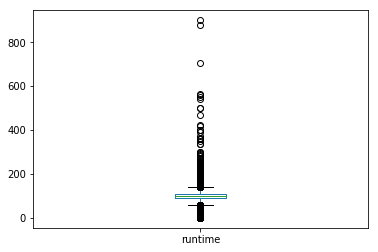

In [62]:
# create boxplot for runtime
df['runtime'].plot(kind='box');

0.15645164346039175

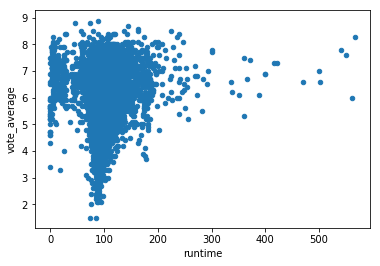

In [63]:
# exclude runtime greater than 600 minutes then plot and calculate correlation
df[df['runtime'] < 600].plot(x='runtime', y='vote_average', kind='scatter')
df[df['runtime'] < 600]['runtime'].corr(df[df['runtime'] < 600]['vote_average'])

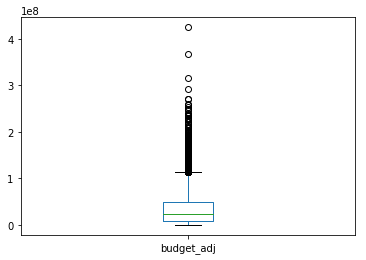

In [64]:
# create boxplot for budget_adj
df[df['budget_adj'] > 0]['budget_adj'].plot(kind='box');

0.11158109995612459

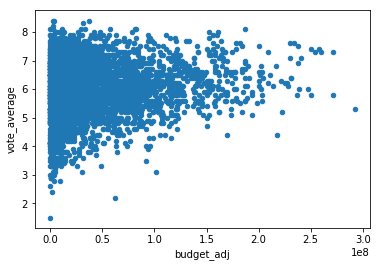

In [65]:
# exclude budget_adj greater than 3e8 then plot and calculate correlation
df.loc[(df.budget_adj > 0) & (df.budget_adj < 3e8)].plot(x='budget_adj', y='vote_average', kind='scatter')
df.loc[(df.budget_adj > 0) & (df.budget_adj < 3e8)]['budget_adj'].corr(df.loc[(df.budget_adj > 0) & (df.budget_adj < 3e8)]['vote_average'])

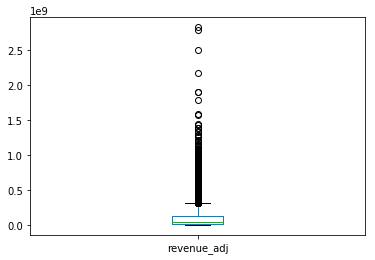

In [66]:
# create boxplot for revenue_adj
df[df['revenue_adj'] > 0]['revenue_adj'].plot(kind='box');

0.24286516070074352

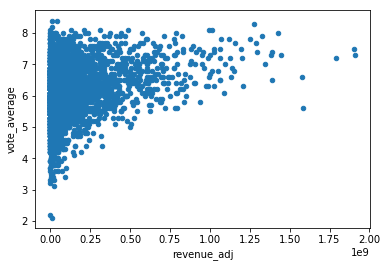

In [67]:
# exclude revenue_adj greater than 2e9 then plot and calculate correlation
df.loc[(df.revenue_adj > 0) & (df.revenue_adj < 2e9)].plot(x='revenue_adj', y='vote_average', kind='scatter')
df.loc[(df.revenue_adj > 0) & (df.revenue_adj < 2e9)]['revenue_adj'].corr(df.loc[(df.revenue_adj > 0) & (df.revenue_adj < 2e9)]['vote_average'])

All three variables have weak positive correlations with `vote_average`. Runtimes, budgets and revenues cannot predict if a movie will elicit high ratings from users. Since these quantitative variables do not hold any significant relationship with the ratings, we can check which genres receive high ratings. A similar analysis from the second question will be implemented.

In [68]:
# create a new dataframe grouping the revenue level and adding the list of genres of movies for that level
df_rating_level = pd.DataFrame(df.groupby('rating_level')['genres_split'].apply(list))
df_rating_level

,genres_split
rating_level,
low,"[[Science Fiction, Fantasy, Action, Adventure]..."
medium,"[[Science Fiction, Action, Thriller, Adventure..."
moderately high,"[[Action, Adventure, Science Fiction, Thriller..."
high,"[[Action, Adventure, Science Fiction, Thriller..."


In [69]:
# create a dictionary of genres per rating level and create a list of rating level
num_genre_per_rating = {}
rating_level = ['low', 'medium', 'moderately_high', 'high']

# count the number of movies per revenue level
for i in range(len(df_rating_level)):
    for j in df_rating_level.iloc[i]:
        num_genre_per_rating[rating_level[i]] = Counter(x for xs in j for x in set(xs))

In [70]:
# print the top 5 genres per rating level
for k, v in num_genre_per_rating.items():
    print('{} rated films are from {}.'.format(k.title(), v.most_common(5)))

Low rated films are from [('Comedy', 1072), ('Thriller', 984), ('Horror', 856), ('Drama', 837), ('Action', 766)].
Medium rated films are from [('Drama', 1177), ('Comedy', 1029), ('Thriller', 790), ('Action', 626), ('Romance', 467)].
Moderately_High rated films are from [('Drama', 1384), ('Comedy', 1007), ('Thriller', 719), ('Action', 596), ('Romance', 535)].
High rated films are from [('Drama', 1363), ('Comedy', 685), ('Thriller', 415), ('Action', 396), ('Romance', 353)].


For medium to high rated films, the rankings remain the same with Drama topping the lists overall. Comedy films receive the lowest ratings from users. Drama films lead by a wide margin in high rated films and only rank fourth in the low rated tier of movies.

The rest of the genres compared with their ratings are shown in the bar plot below. It is sorted by high rating level so the first genre which appears has the highest ratings and so forth. Other observations can be taken from the plot such as more than half of the documentary films elicit high ratings. Most science fiction and horror films do not get the approval or users.

In [71]:
# create new dataframe to contain the number of movies per genre per rating level
df_num_genre_per_rating = pd.DataFrame(num_genre_per_rating)
df_num_genre_per_rating[['high', 'moderately_high', 'medium', 'low']].head()

,high,moderately_high,medium,low
Action,396,596,626,766
Adventure,318,385,374,393
Animation,264,211,154,70
Comedy,685,1007,1029,1072
Crime,341,398,366,250


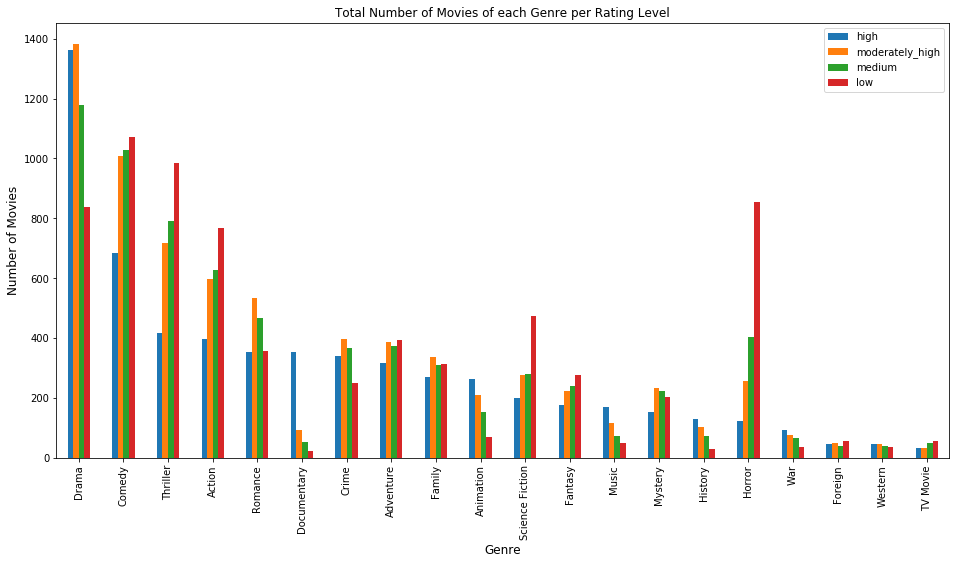

In [72]:
# show bar chart of the number of movies per genre per rating level
ax = df_num_genre_per_rating[['high', 'moderately_high', 'medium', 'low']].sort_values('high', ascending=False).plot(title='Total Number of Movies of each Genre per Rating Level', kind='bar', legend=True, figsize=(16,8))
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Number of Movies', fontsize=12)
plt.show()

<a id='conclusions'></a>
## Conclusions

This analysis explored 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Several questions were posted and were the basis of the analysis. Note that the data was limited to films created and produced from 1960-2015 so the results presented here may not be applicable to movies created before or after this timeframe. There were no statistical tests done so the findings here cannot be regarded as conclusive. However, they can simply be a means to explore patterns and raise ideas to the users whether they are film producers or casual audiences.

**Question 1**: Which genres are most popular from year to year? 

**Answer**: Since 1960, Drama films remain the most popular genres followed by Comedy, Thriller, Action and Romance. Through the years, Drama consistently remained on top. Film producers keep on making these kinds of movies and people continue watching them.

**Question 2**: What kinds of properties are associated with movies that have high revenues?

**Answer**: Movies that have high revenues often have high budgets. They also tend to have higher runtimes and higher user ratings as well. Action films, rather than the more popular Drama, often become box office hits and many people pay to watch them.

**Question 3**: Which major film studios are the most profitable?

**Answer**: Among the thousands of film studios, big name production companies get the lion's share of the profits. These top 5 companies are Universal Pictures, Paramount Pictures, Walt Disney Pictures, Twentieth Century Fox Film Corporation and Columbia Pictures. They have been responsible for producing the most profitable movies of all time such as Star Wars, Avatar, and Titanic.

**Question 4**: What kinds of movies elicit high ratings from users?

**Answer**: Not all film studios aim to get the most profits but rather create quality, excellent films which are approved by users. Similarly, high rated films tend to have higher runtimes, higher budgets and higher revenues but their relationship is weak, thus they cannot predict approval. Drama films overwhelmingly get high ratings so it might explain why they are the most popular from year to year.